In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('../data/processed_data_without_anomaly.csv')

C:\Users\hadid\AppData\Local\Temp\ipykernel_39360\4025197916.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed_data_without_anomaly.csv')


In [4]:
features = ['Lag_1_Status', 'Count_Telat_7D', 'Count_Alpa_30D', 'Streak_Telat', 'Avg_Arrival_Time_7D', 'DayOfWeek']
le = LabelEncoder()

X = df[features]
# Encode 'Lag_1_Status' in the features
X['Lag_1_Status'] = le.fit_transform(X['Lag_1_Status'].astype(str))

y = le.fit_transform(df['note'].astype(str))

C:\Users\hadid\AppData\Local\Temp\ipykernel_39360\870299856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Lag_1_Status'] = le.fit_transform(X['Lag_1_Status'].astype(str))


In [5]:
# 80% train-test split

split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Data Latih: {X_train.shape[0]} baris")
print(f"Data Uji: {X_test.shape[0]} baris")

Data Latih: 104920 baris
Data Uji: 26230 baris


In [6]:
model_rf = RandomForestClassifier(random_state=42, max_depth=7, max_features=3, min_samples_split=5, n_estimators=50)


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.73      0.52      0.61     16442
           1       0.44      0.74      0.55      7765
           2       0.06      0.04      0.05      2023

    accuracy                           0.55     26230
   macro avg       0.41      0.44      0.40     26230
weighted avg       0.59      0.55      0.55     26230


Confusion Matrix for Random Forest:


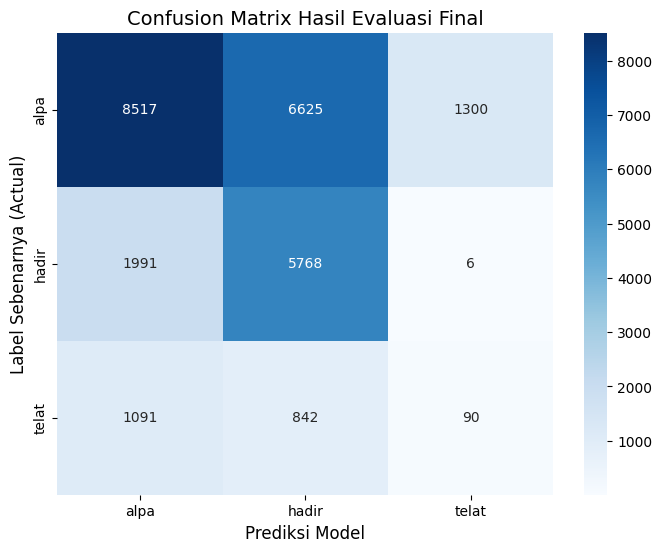

In [9]:
y_pred = model_rf.fit(X_train, y_train).predict(X_test)

# Print classification report
print(f"\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix for Random Forest:")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
              xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prediksi Model', fontsize=12)
plt.ylabel('Label Sebenarnya (Actual)', fontsize=12)
plt.title('Confusion Matrix Hasil Evaluasi Final', fontsize=14)
plt.show()